<a href="https://colab.research.google.com/github/niyeldeii/Neural-Network-from-scratch/blob/main/Neural_Network_from_Scratch_with_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing a Neural Network from Scratch

First we start with, implementing a Neuron in NumPy with a Sigmoid Activation Function
Parameters:


*   	Weights (w): [0,4]
*  Bias (b): 2.5

*  Input (x): [6,7]






In [ ]:
import numpy as np
def sigmoid(x):
  #formula for sigmoid is (1)/(1+(e^-(x))
  return 1/(1+np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights=np.array([0,4])
bias=2.5
n=Neuron(weights,bias)
x=np.array([6,7])
print(n.feedforward(x))



0.9999999999999432


Now let's build a neural network with:
  - 4 inputs
  - a hidden layer with 2 neurons (h1, h2,)
  - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [4, 9]
    - b = 1

In [ ]:
class TheNeuralNetwork:
  def __init__(self, weights, bias):
    self.weights=weights
    self.bias=bias
    self.h1=Neuron(weights,bias)
    self.h2=Neuron(weights,bias)
    self.h3=Neuron(weights,bias)
    self.h4=Neuron(weights,bias)
    self.o1=Neuron(weights,bias)
  def feedforward(self, x):
    out_h1=self.h1.feedforward(x)
    out_h2=self.h2.feedforward(x)
    out_o1=self.o1.feedforward(np.array([out_h1, out_h2,]))
    hidden_outputs = np.array([out_h1, out_h2])
    out_o1 = self.o1.feedforward(hidden_outputs)
    return out_o1

nn=TheNeuralNetwork(weights,bias)
x= np.array([2,3])
print(nn.feedforward(x))

0.9984988147193368


Now let's train our Neural Network to Predict car type given the age and annual income in thousands
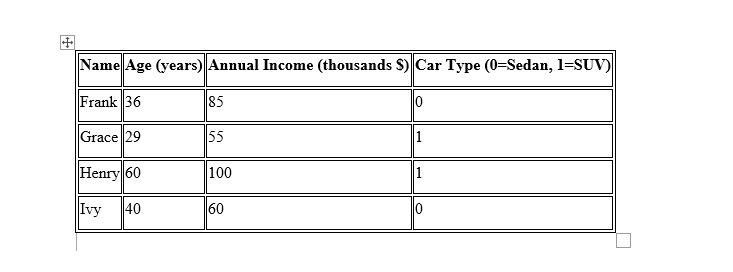

In [ ]:
#first we normalize data by subtractking the mean from age and annual income
import numpy as np

# Define the dataset
ages = np.array([36, 29, 60, 40])
annual_incomes = np.array([85, 55, 100, 60])

# Calculate the mean for each column
mean_age = np.mean(ages)
mean_income = np.mean(annual_incomes)

# Normalize the data by subtracting the mean
normalized_ages = ages - mean_age
normalized_incomes = annual_incomes - mean_income

# Output the normalized values
normalized_ages, normalized_incomes


(array([ -5.25, -12.25,  18.75,  -1.25]), array([ 10., -20.,  25., -15.]))

building a neural network to do the prediction using the normalized data

Epoch 0 loss: 0.276
Epoch 10 loss: 0.258
Epoch 20 loss: 0.242
Epoch 30 loss: 0.230
Epoch 40 loss: 0.220
Epoch 50 loss: 0.212
Epoch 60 loss: 0.206
Epoch 70 loss: 0.201
Epoch 80 loss: 0.196
Epoch 90 loss: 0.193
Epoch 100 loss: 0.190
Epoch 110 loss: 0.188
Epoch 120 loss: 0.185
Epoch 130 loss: 0.184
Epoch 140 loss: 0.182
Epoch 150 loss: 0.181
Epoch 160 loss: 0.179
Epoch 170 loss: 0.178
Epoch 180 loss: 0.178
Epoch 190 loss: 0.177
Epoch 200 loss: 0.176
Epoch 210 loss: 0.175
Epoch 220 loss: 0.175
Epoch 230 loss: 0.174
Epoch 240 loss: 0.174
Epoch 250 loss: 0.173
Epoch 260 loss: 0.173
Epoch 270 loss: 0.173
Epoch 280 loss: 0.172
Epoch 290 loss: 0.172
Epoch 300 loss: 0.172
Epoch 310 loss: 0.172
Epoch 320 loss: 0.171
Epoch 330 loss: 0.171
Epoch 340 loss: 0.171
Epoch 350 loss: 0.171
Epoch 360 loss: 0.171
Epoch 370 loss: 0.170
Epoch 380 loss: 0.170
Epoch 390 loss: 0.170
Epoch 400 loss: 0.170
Epoch 410 loss: 0.170
Epoch 420 loss: 0.170
Epoch 430 loss: 0.170
Epoch 440 loss: 0.170
Epoch 450 loss: 0.169

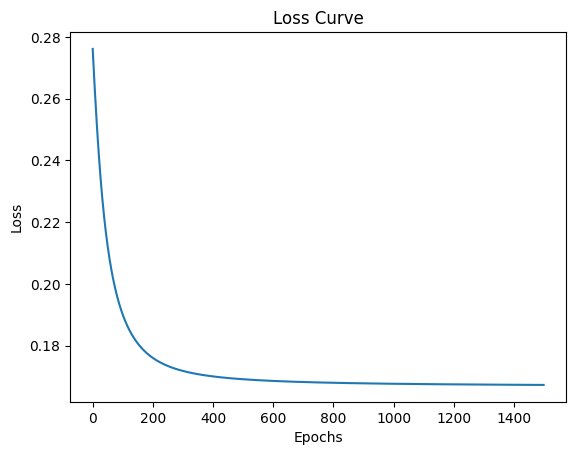

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Mean Squared Error (MSE) loss function
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

class NeuralNetwork:
    def __init__(self):
        # Initialize weights and biases with random values
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        # Feedforward function to calculate the output of the network
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues):
        learn_rate = 0.05
        epochs = 1500
        losses = []

        # Training loop
        for epoch in range(epochs):
            for x, y in zip(data, all_y_trues):
                # Feedforward
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # Backpropagation
                dldypred = -2 * (y - y_pred)

                # Neuron o1 gradients
                dypreddw5 = h1 * derivative_sigmoid(sum_o1)
                dypreddw6 = h2 * derivative_sigmoid(sum_o1)
                dypreddb3 = derivative_sigmoid(sum_o1)

                dypreddh1 = self.w5 * derivative_sigmoid(sum_o1)
                dypreddh2 = self.w6 * derivative_sigmoid(sum_o1)

                # Neuron h1 gradients
                dh1dw1 = x[0] * derivative_sigmoid(sum_h1)
                dh1dw2 = x[1] * derivative_sigmoid(sum_h1)
                dh1db1 = derivative_sigmoid(sum_h1)

                # Neuron h2 gradients
                dh2dw3 = x[0] * derivative_sigmoid(sum_h2)
                dh2dw4 = x[1] * derivative_sigmoid(sum_h2)
                dh2db2 = derivative_sigmoid(sum_h2)

                # Update weights and biases for neuron h1
                self.w1 -= learn_rate * dldypred * dypreddh1 * dh1dw1
                self.w2 -= learn_rate * dldypred * dypreddh1 * dh1dw2
                self.b1 -= learn_rate * dldypred * dypreddh1 * dh1db1

                # Update weights and biases for neuron h2
                self.w3 -= learn_rate * dldypred * dypreddh2 * dh2dw3
                self.w4 -= learn_rate * dldypred * dypreddh2 * dh2dw4
                self.b2 -= learn_rate * dldypred * dypreddh2 * dh2db2

                # Update weights and biases for neuron o1
                self.w5 -= learn_rate * dldypred * dypreddw5
                self.w6 -= learn_rate * dldypred * dypreddw6
                self.b3 -= learn_rate * dldypred * dypreddb3

            # After each epoch, calculate and record the loss
            y_preds = np.apply_along_axis(self.feedforward, 1, data)
            loss = mse_loss(all_y_trues, y_preds)
            losses.append(loss)

            # Print loss every 10 epochs
            if epoch % 10 == 0:
                print(f"Epoch {epoch} loss: {loss:.3f}")

        # Plot the loss curve after training
        plt.plot(range(epochs), losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss Curve")
        plt.show()

# Define training data and target values
data = np.array([[-5.25, 10], [-12.25, 20], [18.75, 25], [-1.25, -15]])
trueys = np.array([1, 0, 0, 1])

# Initialize and train the neural network
network = NeuralNetwork()
network.train(data, trueys)


We see that as the neural network trains and iterates over the data the loss reduces  now lets try it for a new data set

In [73]:

new_data = np.array([[5.0, 15.0], [-8.0, 10.0], [20.0, -10.0],[30,10]])

threshold = 0.5
labels = ["suv" if p > threshold else "sedan" for p in predictions]


print("Predictions for new data:")
for i, (pred, label) in enumerate(zip(predictions, labels)):
    print(f"Data point {new_data[i]} -> Prediction: {pred:.3f}, Label: {label}")

Predictions for new data:
Data point [ 5. 15.] -> Prediction: 0.334, Label: sedan
Data point [-8. 10.] -> Prediction: 0.334, Label: sedan
Data point [ 20. -10.] -> Prediction: 0.952, Label: suv
Data point [30. 10.] -> Prediction: 0.952, Label: suv
